In [1]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/nicolascaseiro/Oscar-Melhor-Filme/refs/heads/main/oscar_melhor_filme.csv")

df.head()

,#,título,ano,direção,duração,nota_imdb,nota_letterboxd,gêneros,roteiro,elenco_principal,indicações,vitórias,venceu_melhor_filme
0,1,Anora,2024,Sean Baker,2h 19min,7.4,3.8,"Comédia, Drama, Romance",Sean Baker,"Mikey Madison, Mark Eydelshteyn, Yura Borisov,...",6,5,True
1,2,A Complete Unknown,2024,James Mangold,2h 21min,7.3,3.6,"Biografia, Drama, Musical","James Mangold, Jay Cocks, Elijah Wald","Timothée Chalamet, Edward Norton, Monica Barba...",8,0,False
2,3,Ainda Estou Aqui,2024,Walter Salles,2h 17min,8.2,4.3,"Biografia, Drama, História","Murilo Hauser, Heitor Lorega, Marcelo Rubens P...","Fernanda Torres, Fernanda Montenegro, Selton M...",3,1,False
3,4,Conclave,2024,Edward Berger,2h,7.4,3.9,"Drama, Suspense","Peter Straughan, Robert Harrisr","Ralph Fiennes, Stanley Tucci, John Lithgow, Is...",8,1,False
4,5,Dune: Part Two,2024,Denis Villeneuve,2h 46min,8.5,4.4,"Aventura, Ação, Drama, Ficção científica","Denis Villeneuve, Jon Spaihts, Frank Herbert","Timothée Chalamet, Zendaya, Javier Bardem, Flo...",5,1,False


In [2]:
linhas, colunas = df.shape[0], df.shape[1]

print(f'Linhas: {linhas}')
print(f'Colunas: {colunas}')

Linhas: 611
Colunas: 13


In [3]:
list(df.columns)

['#',
 'título',
 'ano',
 'direção',
 'duração',
 'nota_imdb',
 'nota_letterboxd',
 'gêneros',
 'roteiro',
 'elenco_principal',
 'indicações',
 'vitórias',
 'venceu_melhor_filme']

In [4]:
todos_generos = df['gêneros'].apply(lambda x: x.split(", "))
todos_generos = [genero for sublist in todos_generos for genero in sublist]

generos_distintos = sorted(set(todos_generos))

print("Gêneros distintos:\n", generos_distintos)

Gêneros distintos:
 ['Animação', 'Aventura', 'Ação', 'Biografia', 'Comédia', 'Crime', 'Drama', 'Esportes', 'Família', 'Fantasia', 'Faroeste', 'Ficção científica', 'Filme noir', 'Guerra', 'História', 'Mistério', 'Musical', 'Música', 'Policial', 'Romance', 'Suspense', 'Terror']


In [5]:
import re

def converter_duracao_para_minutos(duracao_str):
    try:
        horas = re.search(r'(\d+)h', duracao_str)
        minutos = re.search(r'(\d+)min', duracao_str)

        total_minutos = 0
        if horas:
            total_minutos += int(horas.group(1)) * 60
        if minutos:
            total_minutos += int(minutos.group(1))
        return total_minutos
    except:
        return None

df['duração_temp_min'] = df['duração'].apply(converter_duracao_para_minutos)
df['duração_temp_min'] = pd.to_numeric(df['duração_temp_min'], errors='coerce')

media_minutos = df['duração_temp_min'].mean()

horas = int(media_minutos // 60)
minutos = int(media_minutos % 60)

print(f"Média da duração dos filmes: {horas}h {minutos}min")

# Filme mais longo
filme_mais_longo = df.loc[df['duração_temp_min'].idxmax()]
print("\nFilme mais longo:")
print(f"Título: {filme_mais_longo['título']}")
print(f"Duração: {filme_mais_longo['duração']}")
print(f"Ano: {filme_mais_longo['ano']}")

# Filme mais curto
filme_mais_curto = df.loc[df['duração_temp_min'].idxmin()]
print("\nFilme mais curto:")
print(f"Título: {filme_mais_curto['título']}")
print(f"Duração: {filme_mais_curto['duração']}")
print(f"Ano: {filme_mais_curto['ano']}")

df.drop(columns='duração_temp_min', inplace=True)

Média da duração dos filmes: 2h 6min

Filme mais longo:
Título: Gone with the Wind
Duração: 3h 58min
Ano: 1939

Filme mais curto:
Título: She Done Him Wrong
Duração: 1h 6min
Ano: 1933


In [6]:
df[['nota_imdb', 'nota_letterboxd']].describe()

,nota_imdb,nota_letterboxd
count,611.000000,611.000000
mean,7.527496,3.748445
std,0.581685,0.380263
min,5.400000,2.000000
25%,7.200000,3.500000
50%,7.600000,3.800000
75%,7.900000,4.000000
max,9.300000,4.600000


In [7]:
df.sort_values('nota_imdb', ascending=False)[['título', 'ano', 'direção', 'nota_imdb']].head(10)

,título,ano,direção,nota_imdb
220,The Shawshank Redemption,1994,Frank Darabont,9.3
326,The Godfather,1972,Francis Ford Coppola,9.2
402,12 Angry Men,1957,Sidney Lumet,9.0
316,The Godfather Part II,1974,Francis Ford Coppola,9.0
221,Schindler's List,1993,Steven Spielberg,9.0
171,The Lord of the Rings: The Return of the King,2003,Peter Jackson,9.0
185,The Lord of the Rings: The Fellowship of the Ring,2001,Peter Jackson,8.9
216,Forrest Gump,1994,Robert Zemeckis,8.8
218,Pulp Fiction,1994,Quentin Tarantino,8.8
179,The Lord of the Rings: The Two Towers,2002,Peter Jackson,8.8


In [8]:
df.sort_values('nota_letterboxd', ascending=False)[['título', 'ano', 'direção', 'nota_letterboxd']].head(10)

,título,ano,direção,nota_letterboxd
402,12 Angry Men,1957,Sidney Lumet,4.6
316,The Godfather Part II,1974,Francis Ford Coppola,4.6
220,The Shawshank Redemption,1994,Frank Darabont,4.6
326,The Godfather,1972,Francis Ford Coppola,4.5
221,Schindler's List,1993,Steven Spielberg,4.5
48,Parasite,2019,Bong Joon Ho,4.5
155,There Will Be Blood,2007,Paul Thomas Anderson,4.5
171,The Lord of the Rings: The Return of the King,2003,Peter Jackson,4.5
239,GoodFellas,1990,Martin Scorsese,4.5
376,Lawrence of Arabia,1962,David Lean,4.4


In [9]:
df.sort_values('nota_imdb', ascending=True)[['título', 'ano', 'direção', 'nota_imdb']].head(10)

,título,ano,direção,nota_imdb
5,Emilia Pérez,2024,Jacques Audiard,5.4
603,The Broadway Melody,1929,Harry Beaumont,5.5
605,In Old Arizona,1928,"Irving Cummings, Raoul Walsh",5.5
565,Flirtation Walk,1934,Frank Borzage,5.6
568,One Night of Love,1934,Victor Schertzinger,5.6
604,Alibi,1929,Roland West,5.6
594,East Lynne,1931,Frank Lloyd,5.7
606,The Hollywood Revue of 1929,1929,"Charles Reisner, Christy Cabanne, Norman Houston",5.7
593,Cimarron,1931,Wesley Ruggles,5.8
575,Cavalcade,1933,Frank Lloyd,5.8


In [10]:
df.sort_values('nota_letterboxd', ascending=True)[['título', 'ano', 'direção', 'nota_letterboxd']].head(10)

,título,ano,direção,nota_letterboxd
5,Emilia Pérez,2024,Jacques Audiard,2.0
603,The Broadway Melody,1929,Harry Beaumont,2.4
593,Cimarron,1931,Wesley Ruggles,2.4
575,Cavalcade,1933,Frank Lloyd,2.5
597,Trader Horn,1931,W.S. Van Dyke,2.6
606,The Hollywood Revue of 1929,1929,"Charles Reisner, Christy Cabanne, Norman Houston",2.6
605,In Old Arizona,1928,"Irving Cummings, Raoul Walsh",2.6
604,Alibi,1929,Roland West,2.8
599,Disraeli,1929,Alfred E. Green,2.8
543,Anthony Adverse,1936,"Mervyn LeRoy, Michael Curtiz",2.9


In [11]:
df[['indicações', 'vitórias']].describe()

,indicações,vitórias
count,611.000000,611.000000
mean,6.500818,1.911620
std,2.808870,2.062637
min,1.000000,0.000000
25%,4.000000,0.000000
50%,6.000000,1.000000
75%,8.000000,3.000000
max,14.000000,11.000000


In [12]:
df.sort_values('indicações', ascending=False)[['título', 'ano', 'direção', 'indicações', 'vitórias']].head(10)

,título,ano,direção,indicações,vitórias
80,La La Land,2016,Damien Chazelle,14,6
436,All About Eve,1950,Joseph L. Mankiewicz,14,6
201,Titanic,1997,James Cameron,14,11
65,The Shape of Water,2017,Guillermo del Toro,13,4
185,The Lord of the Rings: The Fellowship of the Ring,2001,Peter Jackson,13,4
511,Gone with the Wind,1939,Victor Fleming,13,8
149,The Curious Case of Benjamin Button,2008,David Fincher,13,3
5,Emilia Pérez,2024,Jacques Audiard,13,2
421,From Here to Eternity,1953,Fred Zinnemann,13,8
360,Who's Afraid of Virginia Woolf?,1966,Mike Nichols,13,5


In [13]:
df.sort_values('vitórias', ascending=False)[['título', 'ano', 'direção', 'indicações', 'vitórias']].head(10)

,título,ano,direção,indicações,vitórias
391,Ben-Hur,1959,William Wyler,12,11
201,Titanic,1997,James Cameron,14,11
171,The Lord of the Rings: The Return of the King,2003,Peter Jackson,11,11
381,West Side Story,1961,"Jerome Robbins, Robert Wise",11,10
251,The Last Emperor,1987,Bernardo Bertolucci,9,9
206,The English Patient,1996,Anthony Minghella,12,9
396,Gigi,1958,"Vincente Minnelli, Charles Walters",9,9
146,Slumdog Millionaire,2008,"Danny Boyle, Loveleen Tandan",10,8
276,Gandhi,1982,Richard Attenborough,11,8
266,Amadeus,1984,Milos Forman,11,8


In [14]:
from collections import Counter

generos_todos = df['gêneros'].dropna().apply(lambda x: [g.strip() for g in x.split(',')])
todos_generos = [g for sublist in generos_todos for g in sublist]

contagem_geral = Counter(todos_generos)

print("🎬 Gêneros mais frequentes no dataframe completo:\n")
for genero, freq in contagem_geral.most_common(10):
    print(f"{genero}: {freq}")

🎬 Gêneros mais frequentes no dataframe completo:

Drama: 552
Romance: 225
Comédia: 140
Biografia: 114
Guerra: 80
História: 77
Musical: 73
Suspense: 71
Policial: 71
Aventura: 70


In [15]:
vencedores = df[df['venceu_melhor_filme'] == True]

generos_vencedores = vencedores['gêneros'].dropna().apply(lambda x: [g.strip() for g in x.split(',')])
todos_generos_vencedores = [g for sublist in generos_vencedores for g in sublist]

contagem_vencedores = Counter(todos_generos_vencedores)

print("\n🏆 Gêneros mais frequentes entre vencedores de Melhor Filme:\n")
for genero, freq in contagem_vencedores.most_common(10):
    print(f"{genero}: {freq}")


🏆 Gêneros mais frequentes entre vencedores de Melhor Filme:

Drama: 91
Romance: 32
Biografia: 20
Comédia: 19
Guerra: 16
Musical: 13
Policial: 12
História: 11
Suspense: 11
Aventura: 10


In [16]:
from collections import Counter

def contar_participacoes(df, coluna, titulo):
    participacoes_indicados = df[coluna].dropna().apply(lambda x: [n.strip() for n in x.split(',')])
    todos_nomes_indicados = [nome for sublist in participacoes_indicados for nome in sublist]
    contagem_indicados = Counter(todos_nomes_indicados)

    vencedores = df[df['venceu_melhor_filme'] == True]
    participacoes_vencedores = vencedores[coluna].dropna().apply(lambda x: [n.strip() for n in x.split(',')])
    todos_nomes_vencedores = [nome for sublist in participacoes_vencedores for nome in sublist]
    contagem_vencedores = Counter(todos_nomes_vencedores)

    nomes_unicos = set(contagem_indicados.keys()) | set(contagem_vencedores.keys())
    dados = []
    for nome in nomes_unicos:
        dados.append({
            'nome': nome,
            'indicados': contagem_indicados.get(nome, 0),
            'vencedores': contagem_vencedores.get(nome, 0)
        })

    df_resultado = pd.DataFrame(dados)

    print(f"📌 Top 10 {titulo} mais recorrentes em filmes indicados a Melhor Filme:\n")
    print(df_resultado.sort_values(by='indicados', ascending=False).head(10))

    print(f"\n\n🏆 Top 10 {titulo} mais recorrentes em filmes vencedores de Melhor Filme:\n")
    print(df_resultado.sort_values(by='vencedores', ascending=False).head(10))

contar_participacoes(df, 'elenco_principal', 'atores')

📌 Top 10 atores mais recorrentes em filmes indicados a Melhor Filme:

                   nome  indicados  vencedores
751      Robert De Niro         11           2
118   Leonardo DiCaprio         11           2
230      Cate Blanchett         10           1
581           Tom Hanks         10           1
1038     William Holden          9           1
1180     Jack Nicholson          9           3
193           Brad Pitt          8           1
1177        Gary Cooper          8           0
549         Henry Fonda          8           0
102        Gregory Peck          8           1


🏆 Top 10 atores mais recorrentes em filmes vencedores de Melhor Filme:

                  nome  indicados  vencedores
857       Jack Hawkins          3           3
1408    Dustin Hoffman          8           3
815        Colin Firth          4           3
1290    Morgan Freeman          4           3
1035       Clark Gable          5           3
275       Meryl Streep          7           3
1235  Shirley Mac

In [17]:
contar_participacoes(df, 'direção', 'diretores')

📌 Top 10 diretores mais recorrentes em filmes indicados a Melhor Filme:

                 nome  indicados  vencedores
104     William Wyler         13           3
215  Steven Spielberg         13           1
241   Martin Scorsese         10           1
236      George Cukor          9           1
33          John Ford          9           1
28       Mervyn LeRoy          8           0
344    Michael Curtiz          7           1
229       Frank Capra          7           2
69     George Stevens          7           0
295        Henry King          7           0


🏆 Top 10 diretores mais recorrentes em filmes vencedores de Melhor Filme:

                  nome  indicados  vencedores
104      William Wyler         13           3
305         Elia Kazan          4           2
35         Robert Wise          4           2
229        Frank Capra          7           2
137     Clint Eastwood          5           2
220     Fred Zinnemann          6           2
61         Frank Lloyd          3

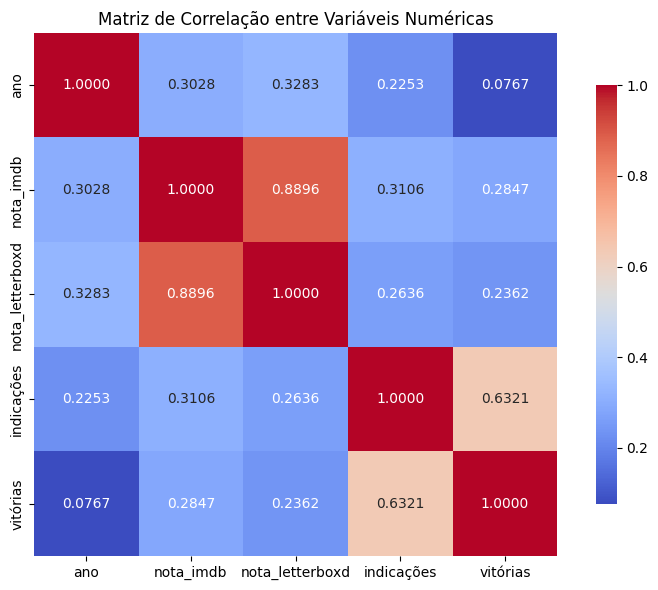

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

colunas_para_correlacao = ['ano', 'nota_imdb', 'nota_letterboxd', 'indicações', 'vitórias']
df_correlacao = df[colunas_para_correlacao]

matriz_correlacao = df_correlacao.corr(method='pearson')

plt.figure(figsize=(8,6))

sns.heatmap(matriz_correlacao, annot=True, fmt=".4f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

plt.title('Matriz de Correlação entre Variáveis Numéricas')
plt.tight_layout()
plt.show()

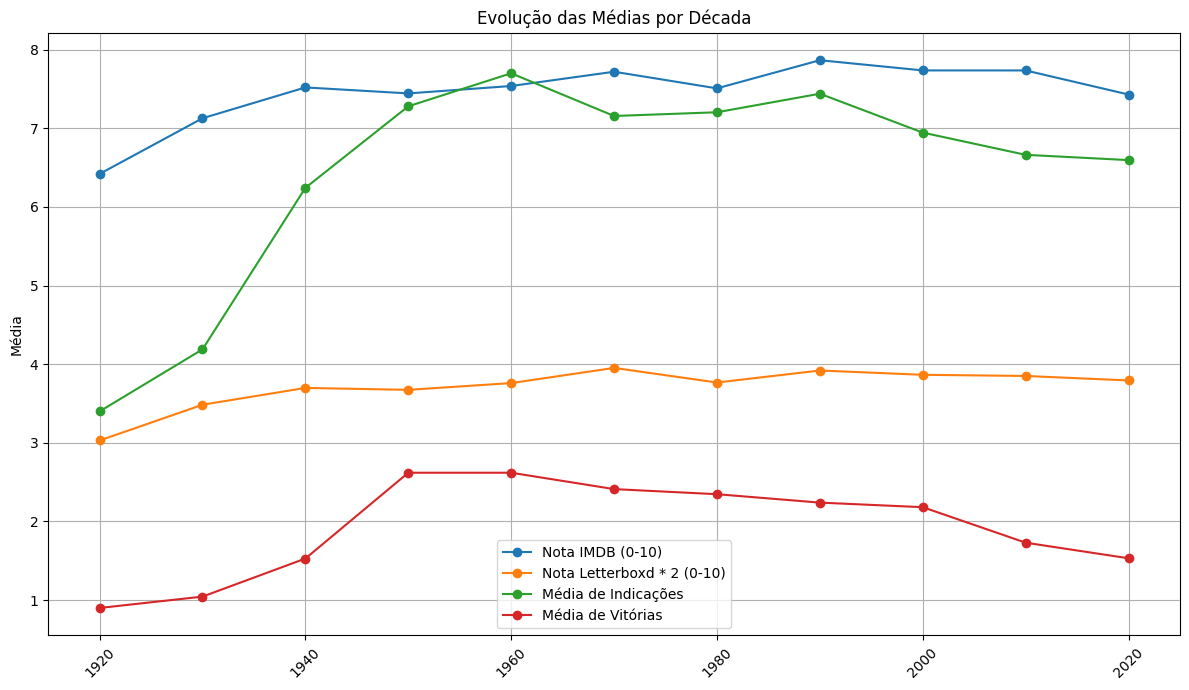

In [19]:
df['década'] = (df['ano'] // 10) * 10

df_por_decada = df.groupby('década')[['nota_imdb', 'nota_letterboxd', 'indicações', 'vitórias']].mean().reset_index()

plt.figure(figsize=(12, 7))

plt.plot(df_por_decada['década'], df_por_decada['nota_imdb'], marker='o', label='Nota IMDB (0-10)')
plt.plot(df_por_decada['década'], df_por_decada['nota_letterboxd'], marker='o', label='Nota Letterboxd * 2 (0-10)')  # normaliza a nota Letterboxd
plt.plot(df_por_decada['década'], df_por_decada['indicações'], marker='o', label='Média de Indicações')
plt.plot(df_por_decada['década'], df_por_decada['vitórias'], marker='o', label='Média de Vitórias')

plt.xticks(rotation=45)
plt.ylabel('Média')
plt.title('Evolução das Médias por Década')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

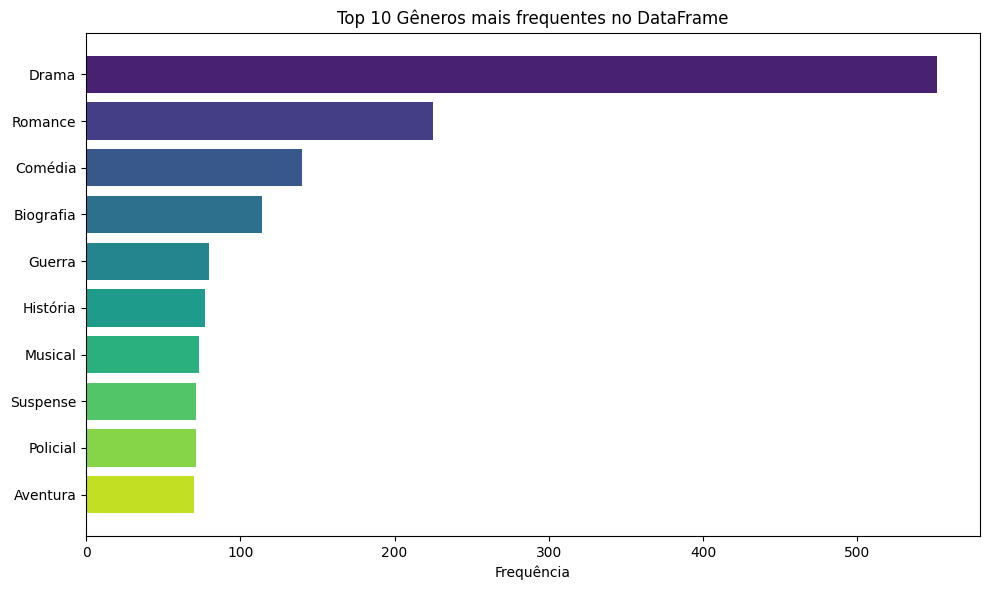

In [20]:
from collections import Counter

generos_todos = df['gêneros'].dropna().apply(lambda x: [g.strip() for g in x.split(',')])
todos_generos = [g for sublist in generos_todos for g in sublist]
contagem_geral = Counter(todos_generos)

top10_generos = contagem_geral.most_common(10)
generos, frequencias = zip(*top10_generos)

paleta = sns.color_palette("viridis", n_colors=len(generos))

plt.figure(figsize=(10,6))
bars = plt.barh(range(len(generos)), frequencias, color=paleta)
plt.yticks(range(len(generos)), generos)
plt.xlabel('Frequência')
plt.title('Top 10 Gêneros mais frequentes no DataFrame')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

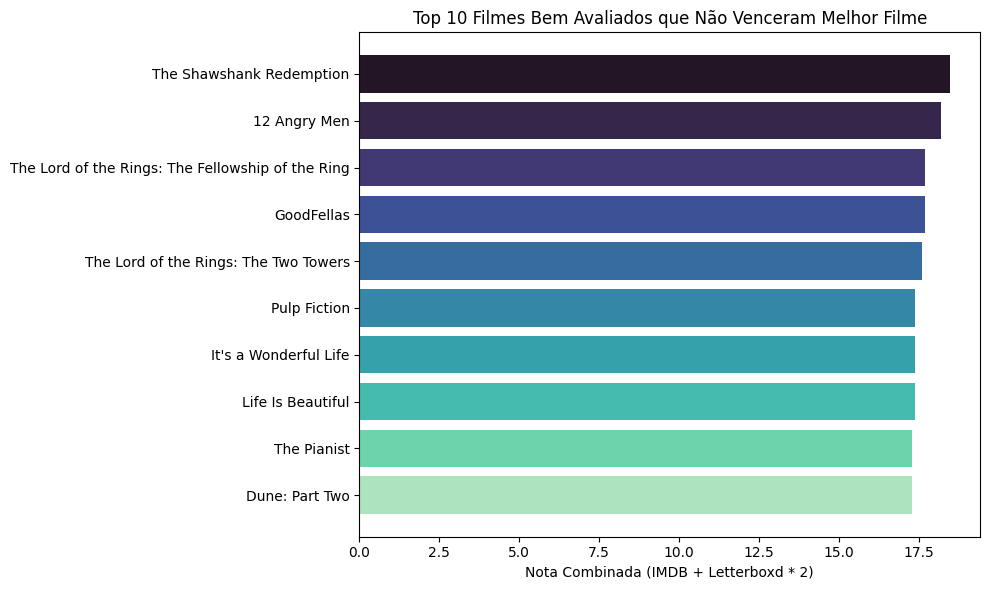

In [21]:
melhorzinhos_sem_melhor_filme = df[df['venceu_melhor_filme'] == False].copy()
melhorzinhos_sem_melhor_filme['nota_combinada'] = (
    melhorzinhos_sem_melhor_filme['nota_imdb'] + melhorzinhos_sem_melhor_filme['nota_letterboxd'] * 2
)

top10 = melhorzinhos_sem_melhor_filme.sort_values(by='nota_combinada', ascending=False).head(10)

plt.figure(figsize=(10,6))
paleta = sns.color_palette("mako", n_colors=10)
bars = plt.barh(top10['título'], top10['nota_combinada'], color=paleta)
plt.xlabel('Nota Combinada (IMDB + Letterboxd * 2)')
plt.title('Top 10 Filmes Bem Avaliados que Não Venceram Melhor Filme')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

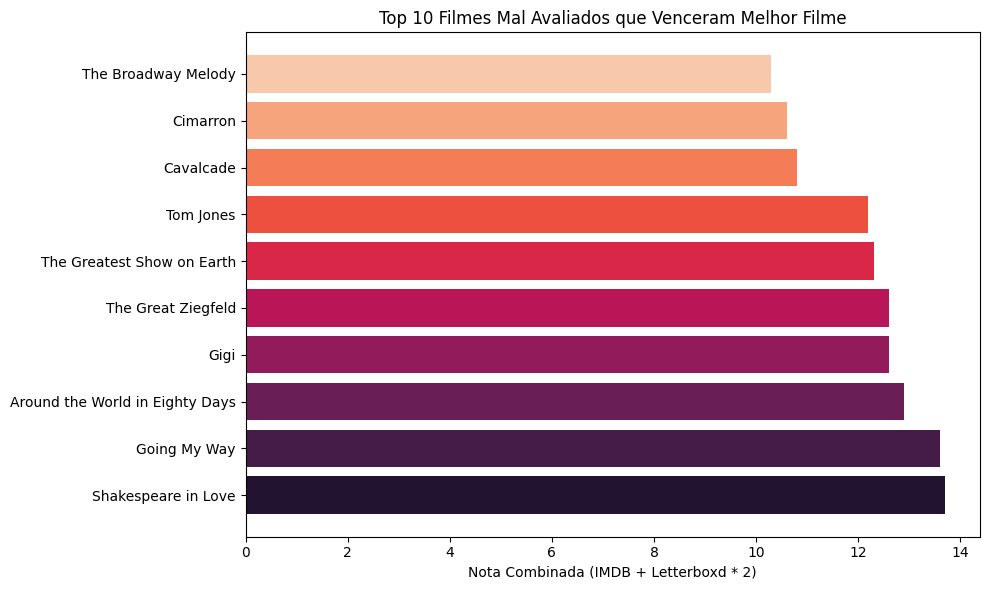

In [22]:
vencedores = df[df['venceu_melhor_filme'] == True].copy()

vencedores['nota_combinada'] = vencedores['nota_imdb'] + vencedores['nota_letterboxd'] * 2

piorzinhos_com_melhor_filme = vencedores.sort_values(by='nota_combinada', ascending=True).head(10)

plt.figure(figsize=(10,6))
paleta = sns.color_palette("rocket_r", n_colors=10)
bars = plt.barh(piorzinhos_com_melhor_filme['título'], piorzinhos_com_melhor_filme['nota_combinada'], color=paleta)
plt.xlabel('Nota Combinada (IMDB + Letterboxd * 2)')
plt.title('Top 10 Filmes Mal Avaliados que Venceram Melhor Filme')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

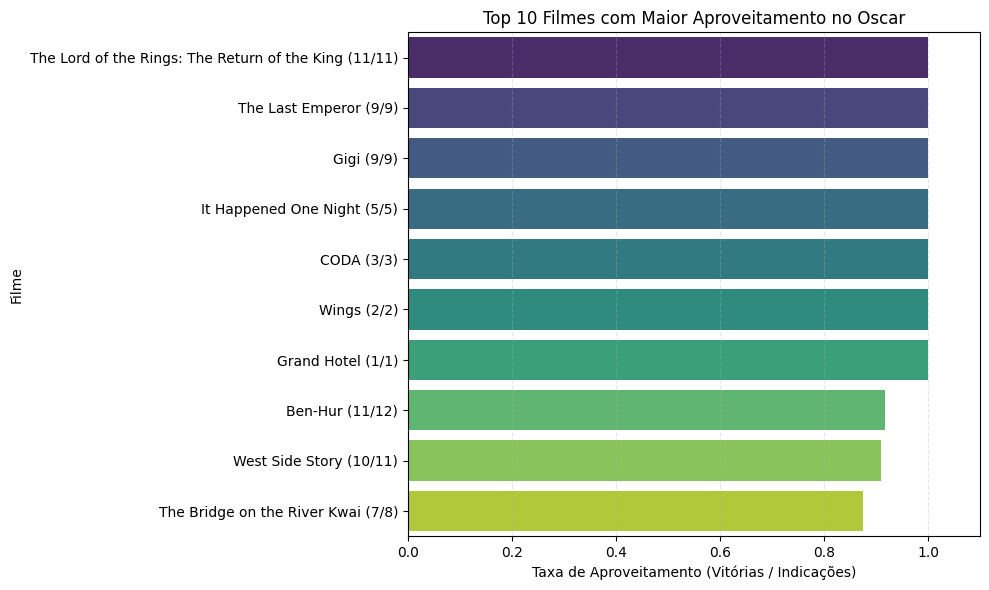

In [23]:
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

df['taxa_aproveitamento'] = df['vitórias'] / df['indicações']

top10_aproveitamento = df.sort_values(
    by=['taxa_aproveitamento', 'indicações'],
    ascending=[False, False]
).head(10).copy()

top10_aproveitamento['título_com_taxa'] = top10_aproveitamento.apply(
    lambda row: f"{row['título']} ({int(row['vitórias'])}/{int(row['indicações'])})", axis=1
)

plt.figure(figsize=(10, 6))
barplot = sns.barplot(
    x='taxa_aproveitamento',
    y='título_com_taxa',
    data=top10_aproveitamento,
    palette='viridis'
)

plt.xlabel('Taxa de Aproveitamento (Vitórias / Indicações)')
plt.ylabel('Filme')
plt.title('Top 10 Filmes com Maior Aproveitamento no Oscar')
plt.xlim(0, 1.1)
plt.grid(True, axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

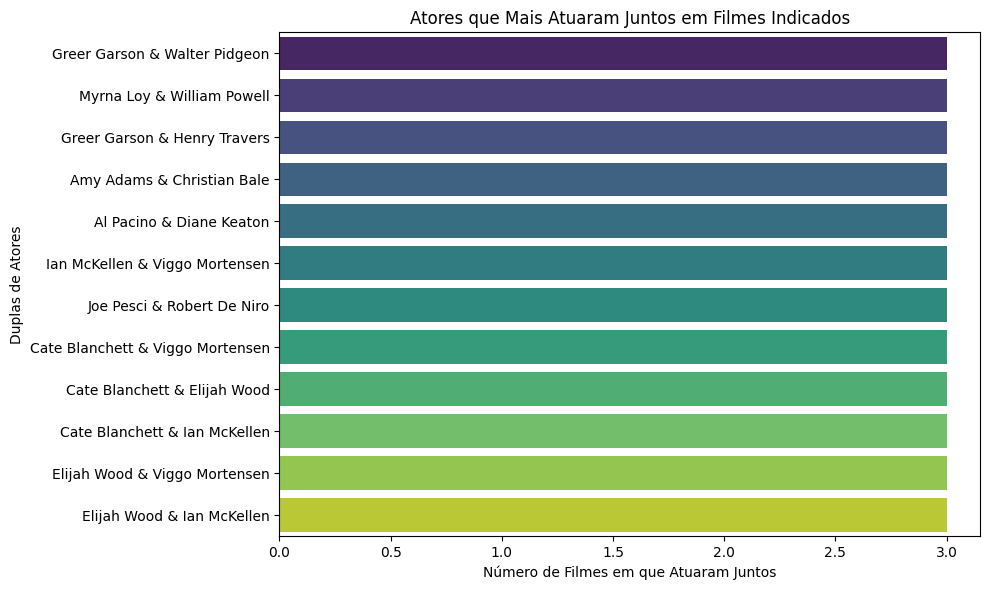

Quantidade de duplas que atuaram juntas exatamente 3 vezes: 12


In [24]:
from collections import Counter
from itertools import combinations
import matplotlib.pyplot as plt
import seaborn as sns

elencos = df['elenco_principal'].dropna().apply(lambda x: [a.strip() for a in x.split(',')])

duplas_atores = []
for elenco in elencos:
    if len(elenco) >= 2:
        duplas_atores.extend(combinations(sorted(elenco), 2))

contagem_duplas_atores = Counter(duplas_atores)
df_duplas_atores = pd.DataFrame(contagem_duplas_atores.items(), columns=['Dupla', 'Frequência'])
df_duplas_atores = df_duplas_atores.sort_values(by='Frequência', ascending=False).head(12)

plt.figure(figsize=(10,6))
sns.barplot(
    x='Frequência',
    y=df_duplas_atores['Dupla'].apply(lambda x: f"{x[0]} & {x[1]}"),
    data=df_duplas_atores,
    palette='viridis'
)
plt.title('Atores que Mais Atuaram Juntos em Filmes Indicados')
plt.xlabel('Número de Filmes em que Atuaram Juntos')
plt.ylabel('Duplas de Atores')
plt.tight_layout()
plt.show()

freq_3 = sum(count == 3 for count in contagem_duplas_atores.values())
print(f"Quantidade de duplas que atuaram juntas exatamente 3 vezes: {freq_3}")

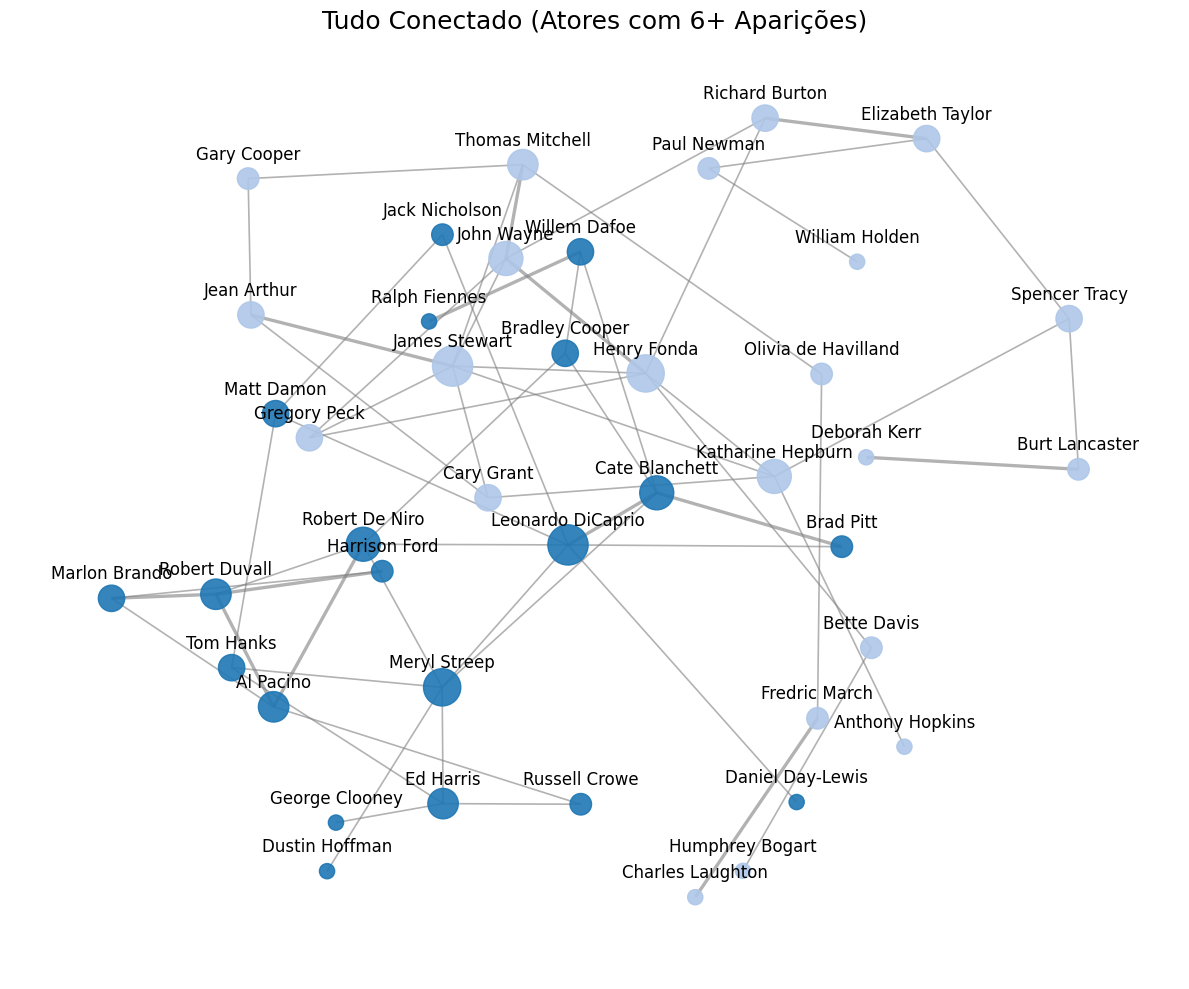

In [25]:
import networkx as nx
from collections import Counter
from itertools import combinations
import matplotlib.cm as cm

elencos = df['elenco_principal'].dropna().apply(lambda x: [a.strip() for a in x.split(',')])

todos_atores = [ator for elenco in elencos for ator in elenco]
contagem_atores = Counter(todos_atores)

atores_relevantes = {ator for ator, freq in contagem_atores.items() if freq >= 6}

duplas_relevantes = []
for elenco in elencos:
    elenco_filtrado = [ator for ator in elenco if ator in atores_relevantes]
    duplas_relevantes.extend(combinations(sorted(elenco_filtrado), 2))

contagem_duplas_relevantes = Counter(duplas_relevantes)

G = nx.Graph()
for (ator1, ator2), freq in contagem_duplas_relevantes.items():
    G.add_edge(ator1, ator2, weight=freq)

pos = nx.spring_layout(G, k=0.75, seed=42)

graus = dict(G.degree())
node_sizes = [graus[n] * 120 for n in G.nodes()]

componentes = list(nx.connected_components(G))
cores_disponiveis = cm.tab20.colors
node_colors = {}

for i, componente in enumerate(componentes):
    cor = cores_disponiveis[i % len(cores_disponiveis)]
    for node in componente:
        node_colors[node] = cor

node_color_list = [node_colors[n] for n in G.nodes()]
edge_widths = [max(1, d['weight'] * 1.2) for (_, _, d) in G.edges(data=True)]

label_pos = {k: (v[0], v[1] + 0.06) for k, v in pos.items()}

plt.figure(figsize=(12, 10))
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_color_list, alpha=0.9)
nx.draw_networkx_edges(G, pos, width=edge_widths, edge_color='gray', alpha=0.6)
nx.draw_networkx_labels(G, label_pos, font_size=12)

plt.title("Tudo Conectado (Atores com 6+ Aparições)", fontsize=18)
plt.axis('off')
plt.tight_layout()
plt.show()

<Axes: xlabel='ano', ylabel='nota_imdb'>

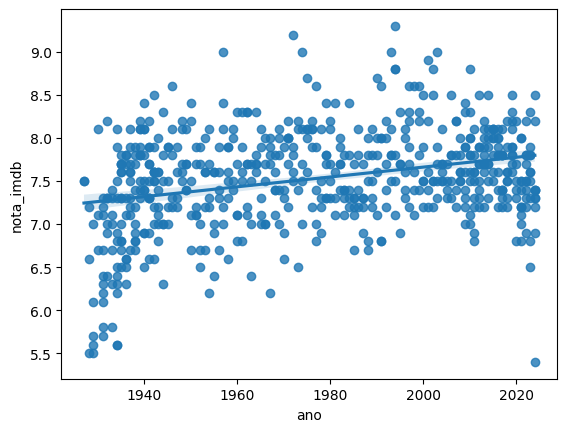

In [26]:
sns.regplot(data=df, x='ano', y='nota_imdb')

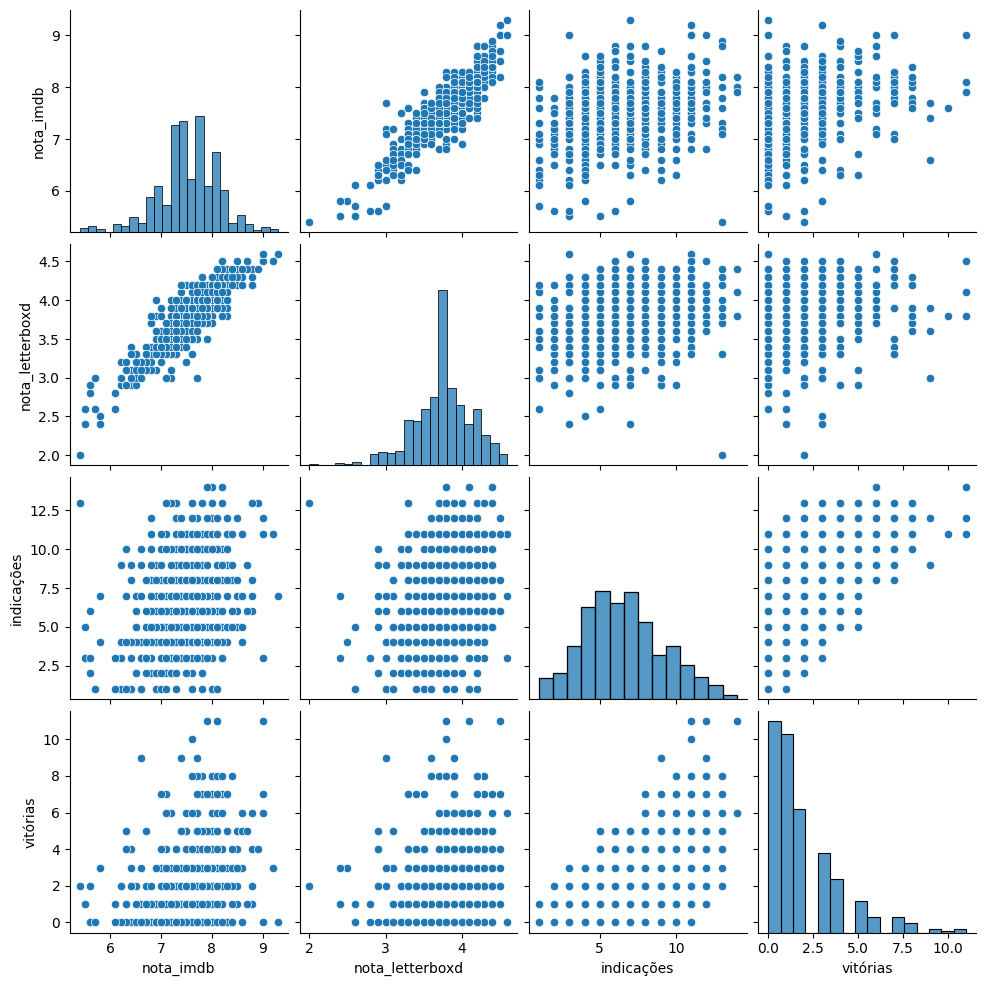

In [27]:
sns.pairplot(df[['nota_imdb', 'nota_letterboxd', 'indicações', 'vitórias']])

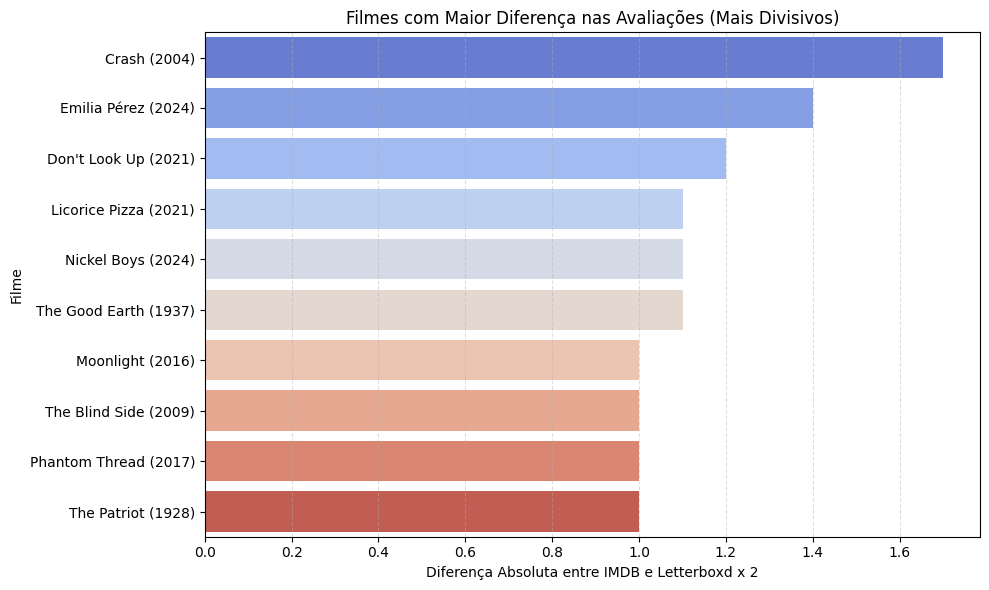

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

df['diferença_notas'] = abs(df['nota_imdb'] - (df['nota_letterboxd'] * 2))

mais_divisivos = df.sort_values(by='diferença_notas', ascending=False).head(10).copy()

mais_divisivos['título_com_ano'] = mais_divisivos['título'] + ' (' + df['ano'].astype(str) + ')'

plt.figure(figsize=(10, 6))
sns.barplot(
    x='diferença_notas',
    y='título_com_ano',
    data=mais_divisivos,
    palette='coolwarm'
)
plt.xlabel('Diferença Absoluta entre IMDB e Letterboxd x 2')
plt.ylabel('Filme')
plt.title('Filmes com Maior Diferença nas Avaliações (Mais Divisivos)')
plt.grid(True, axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

df.drop(columns='diferença_notas', inplace=True)

In [29]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

df['vitorias_sem_melhor_filme'] = np.where(df['venceu_melhor_filme'] == True, df['vitórias'] - 1, df['vitórias'])

df['vitorias_sem_melhor_filme'] = df['vitorias_sem_melhor_filme'].clip(lower=0)

features = ['ano', 'nota_imdb', 'nota_letterboxd', 'indicações', 'vitorias_sem_melhor_filme']
X = df[features]
y = df['venceu_melhor_filme'].astype(int)

df_clean = df.dropna(subset=features + ['venceu_melhor_filme'])
X = df_clean[features]
y = df_clean['venceu_melhor_filme'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

model = LogisticRegression(max_iter=1024, random_state=42)

model.fit(X_train, y_train)

LogisticRegression(max_iter=1024, random_state=42)

In [30]:
y_pred = model.predict(X_test)

y_proba = model.predict_proba(X_test)[:, 1]

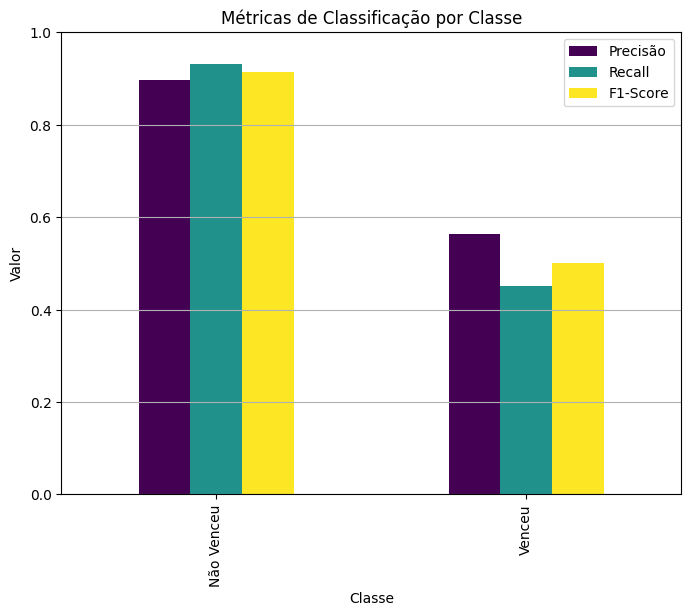

In [31]:
from sklearn.metrics import precision_recall_fscore_support

precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average=None, labels=[0,1])
labels = ['Não Venceu', 'Venceu']

metrics_df = pd.DataFrame({
    'Classe': labels,
    'Precisão': precision,
    'Recall': recall,
    'F1-Score': f1
})

metrics_df.set_index('Classe', inplace=True)
metrics_df.plot(kind='bar', figsize=(8,6), colormap='viridis')
plt.title('Métricas de Classificação por Classe')
plt.ylim(0,1)
plt.ylabel('Valor')
plt.grid(axis='y')
plt.show()

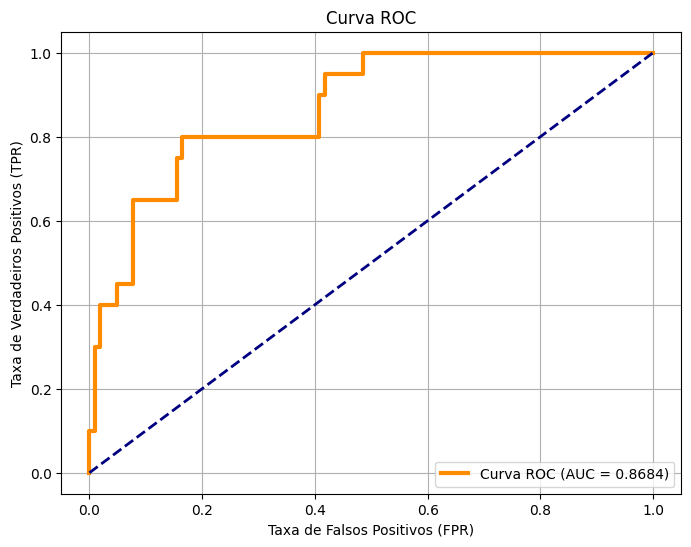

In [32]:
from sklearn.metrics import roc_auc_score, roc_curve

roc_auc = roc_auc_score(y_test, y_proba)
fpr, tpr, _ = roc_curve(y_test, y_proba)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=3, label=f'Curva ROC (AUC = {roc_auc:.4f})')
plt.plot([0,1],[0,1], color='navy', lw=2, linestyle='--')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

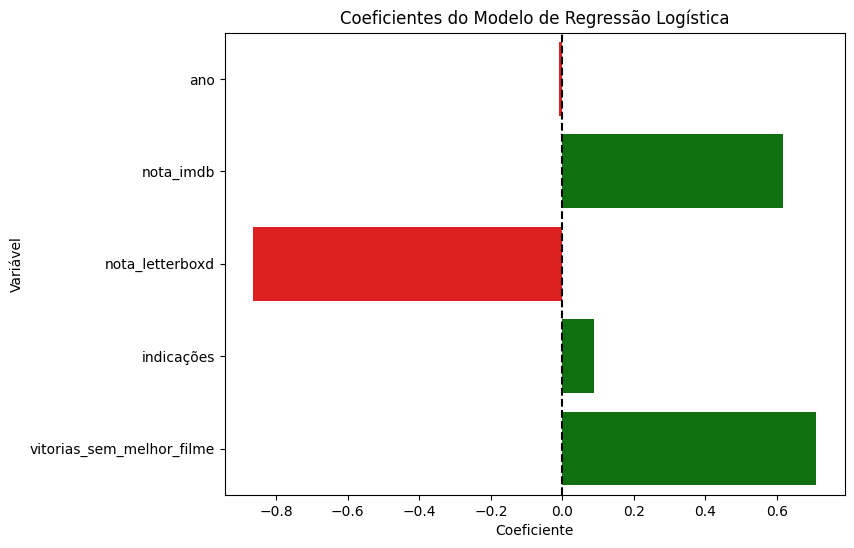

In [33]:
coef_df = pd.DataFrame({
    'Variável': model.feature_names_in_, 'Coeficiente': model.coef_[0]
})

coef_df['Sinal'] = coef_df['Coeficiente'].apply(lambda x: 'Positivo' if x > 0 else 'Negativo')

plt.figure(figsize=(8,6))
sns.barplot(x='Coeficiente', y='Variável', data=coef_df,
            hue='Sinal', palette={'Positivo':'green', 'Negativo':'red'}, legend=False)

plt.title('Coeficientes do Modelo de Regressão Logística')
plt.axvline(0, color='black', linestyle='--')
plt.xlabel('Coeficiente')
plt.ylabel('Variável')
plt.show()

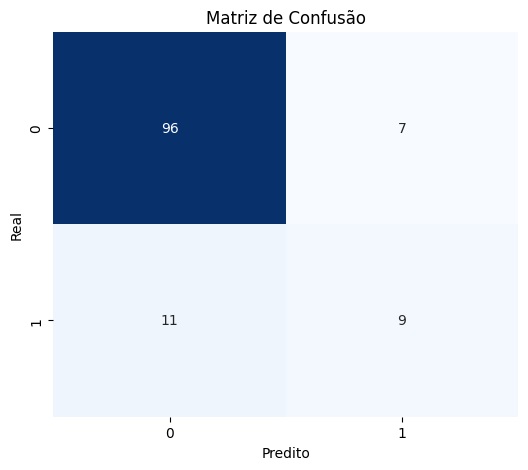

In [34]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

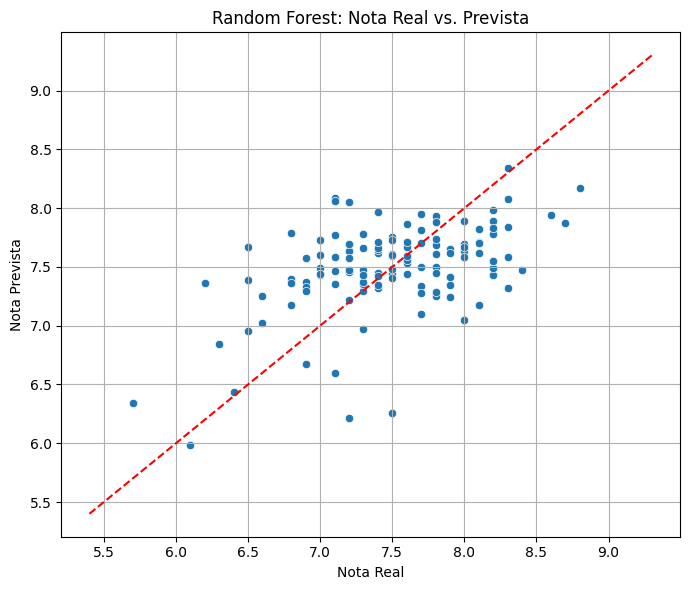

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

df_rf = df.copy()

def converter_duracao_para_minutos(duracao_str):
    try:
        horas = re.search(r'(\d+)h', duracao_str)
        minutos = re.search(r'(\d+)min', duracao_str)

        total_minutos = 0
        if horas:
            total_minutos += int(horas.group(1)) * 60
        if minutos:
            total_minutos += int(minutos.group(1))
        return total_minutos
    except:
        return None

df_rf['duração_minutos'] = df_rf['duração'].apply(converter_duracao_para_minutos)

df_rf = df_rf.dropna(subset=['duração_minutos', 'nota_imdb', 'ano', 'indicações', 'vitórias'])

X = df_rf[['ano', 'duração_minutos', 'indicações', 'vitórias']]
y = df_rf['nota_imdb']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

plt.figure(figsize=(7, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Nota Real')
plt.ylabel('Nota Prevista')
plt.title('Random Forest: Nota Real vs. Prevista')
plt.grid(True)
plt.tight_layout()
plt.show()

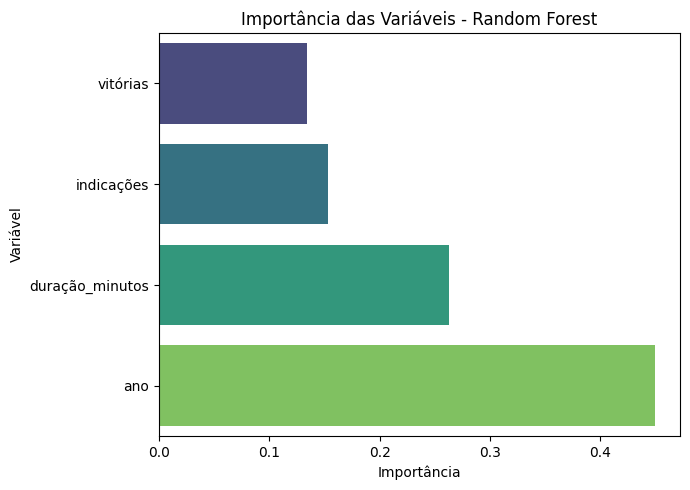

In [36]:
importances = rf_model.feature_importances_
importancia_df = pd.DataFrame({
    'Variável': X.columns,
    'Importância': importances
}).sort_values(by='Importância', ascending=True)

plt.figure(figsize=(7, 5))
sns.barplot(x='Importância', y='Variável', data=importancia_df, palette='viridis')
plt.title('Importância das Variáveis - Random Forest')
plt.tight_layout()
plt.show()

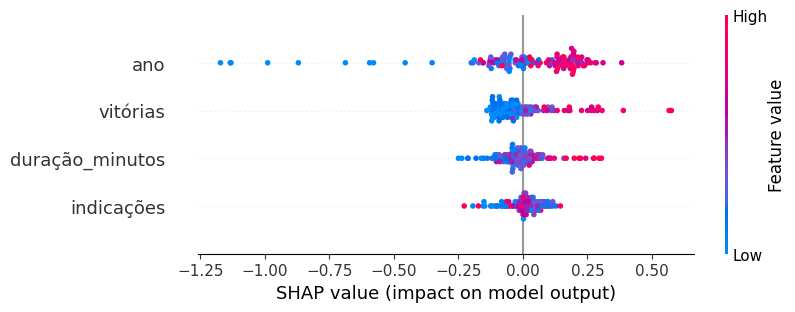

In [37]:
import shap

from sklearn.model_selection import train_test_split

def converter_duracao_para_minutos(duracao_str):
    try:
        horas = re.search(r'(\d+)h', duracao_str)
        minutos = re.search(r'(\d+)min', duracao_str)

        total_minutos = 0
        if horas:
            total_minutos += int(horas.group(1)) * 60
        if minutos:
            total_minutos += int(minutos.group(1))
        return total_minutos
    except:
        return None

df['duração_minutos'] = df['duração'].apply(converter_duracao_para_minutos)

variaveis = ['ano', 'duração_minutos', 'indicações', 'vitórias']
X = df[variaveis].dropna()
y = df.loc[X.index, 'nota_imdb']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo = RandomForestRegressor(random_state=42)
modelo.fit(X_train, y_train)

explainer = shap.Explainer(modelo, X_test)
shap_values = explainer(X_test)

shap.plots.beeswarm(shap_values)

In [38]:
df.drop(columns=['década', 'duração_minutos', 'vitorias_sem_melhor_filme', 'taxa_aproveitamento'], inplace=True, errors='ignore')

df.head()

,#,título,ano,direção,duração,nota_imdb,nota_letterboxd,gêneros,roteiro,elenco_principal,indicações,vitórias,venceu_melhor_filme
0,1,Anora,2024,Sean Baker,2h 19min,7.4,3.8,"Comédia, Drama, Romance",Sean Baker,"Mikey Madison, Mark Eydelshteyn, Yura Borisov,...",6,5,True
1,2,A Complete Unknown,2024,James Mangold,2h 21min,7.3,3.6,"Biografia, Drama, Musical","James Mangold, Jay Cocks, Elijah Wald","Timothée Chalamet, Edward Norton, Monica Barba...",8,0,False
2,3,Ainda Estou Aqui,2024,Walter Salles,2h 17min,8.2,4.3,"Biografia, Drama, História","Murilo Hauser, Heitor Lorega, Marcelo Rubens P...","Fernanda Torres, Fernanda Montenegro, Selton M...",3,1,False
3,4,Conclave,2024,Edward Berger,2h,7.4,3.9,"Drama, Suspense","Peter Straughan, Robert Harrisr","Ralph Fiennes, Stanley Tucci, John Lithgow, Is...",8,1,False
4,5,Dune: Part Two,2024,Denis Villeneuve,2h 46min,8.5,4.4,"Aventura, Ação, Drama, Ficção científica","Denis Villeneuve, Jon Spaihts, Frank Herbert","Timothée Chalamet, Zendaya, Javier Bardem, Flo...",5,1,False
